## Heavy precipitation metrics

F_p>10 - Frequency of heavy precipitaiton is estimated from the frequency of griboxes exceeding 10 mm/day from monhtly average values

<br>
(according Schiro et al, a greater F_p>10 could potentially be associated with increased precipitation efficiency and convective organisation)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [57]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [6]:
model='GFDL-CM3'
experiment='historical'

In [9]:
folder = '/Users/cbla0002/Documents/data/cmip5/ds'
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    precip   (time, lat, lon) float32 ...

In [11]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 10950, lat: 22, lon: 128)>
[30835200 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [27]:
precip_monthly = precip.resample(time='M').mean(dim='time')*24*60*60
precip_monthly

<xarray.DataArray 'precip' (time: 360, lat: 22, lon: 128)>
array([[[3.10504466e-01, 2.96215177e-01, 2.94394076e-01, ...,
         3.93280715e-01, 3.55783165e-01, 3.20438266e-01],
        [3.12378764e-01, 2.96079785e-01, 2.64252067e-01, ...,
         4.44551259e-01, 4.10149217e-01, 3.59783977e-01],
        [3.41911256e-01, 3.09574276e-01, 2.61125058e-01, ...,
         4.43477154e-01, 4.03435558e-01, 3.73126537e-01],
        ...,
        [1.57393143e-02, 2.03353278e-02, 2.64565274e-02, ...,
         7.84972217e-03, 5.55258803e-03, 6.24025567e-03],
        [6.67622387e-02, 5.97879812e-02, 9.29588750e-02, ...,
         2.50995085e-02, 1.96530074e-02, 5.34700900e-02],
        [3.73122811e-01, 4.69581217e-01, 4.70946342e-01, ...,
         5.27810693e-01, 2.39417389e-01, 1.98363945e-01]],

       [[4.37218100e-01, 4.19154137e-01, 3.46443832e-01, ...,
         6.22608483e-01, 5.57665765e-01, 4.76290762e-01],
        [4.19749171e-01, 3.79674494e-01, 2.95202196e-01, ...,
         6.03923321e-01, 5.11597753e-01, 4.57074702e-01],
        [4.25392240e-01, 3.66243601e-01, 2.74539053e-01, ...,
         6.36203766e-01, 5.62922001e-01, 4.88067895e-01],
...
        [9.40951705e-03, 8.25110730e-03, 5.10818372e-03, ...,
         2.43278942e-03, 3.44354170e-03, 5.72531298e-03],
        [2.21114163e-03, 2.81693181e-03, 2.11885828e-03, ...,
         2.16026641e-02, 3.69708729e-03, 1.52976508e-03],
        [6.49065431e-03, 5.94831584e-03, 3.97986080e-03, ...,
         5.82436144e-01, 1.96389452e-01, 2.83731539e-02]],

       [[6.20875597e-01, 5.59065819e-01, 4.69513476e-01, ...,
         3.24783564e-01, 4.25033778e-01, 5.62488198e-01],
        [3.99314433e-01, 3.61545920e-01, 2.92269558e-01, ...,
         3.17761540e-01, 3.33413720e-01, 3.63644749e-01],
        [3.97713035e-01, 3.17616343e-01, 2.50155419e-01, ...,
         3.43693703e-01, 3.70336354e-01, 4.13433343e-01],
        ...,
        [7.31454231e-04, 7.41524913e-04, 6.18949474e-04, ...,
         2.72369245e-03, 9.45763779e-04, 1.85865181e-04],
        [2.86032038e-04, 5.88197843e-04, 2.25706794e-03, ...,
         1.66235631e-03, 3.41175066e-04, 2.54820974e-04],
        [5.38279861e-03, 1.20635927e-02, 1.48801692e-02, ...,
         4.66951095e-02, 3.20847780e-02, 1.18910316e-02]]], dtype=float32)
Coordinates:
  * time     (time) object 1970-01-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

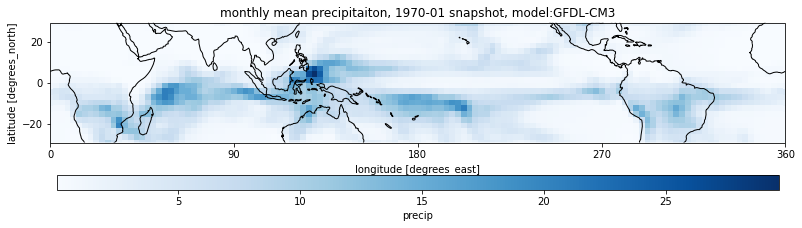

In [63]:
plot_snapshot(precip_monthly.isel(time=0), 'Blues', 'monthly mean precipitaiton, ' + str(precip_monthly.isel(time=0).coords['time'].values)[:7], model)

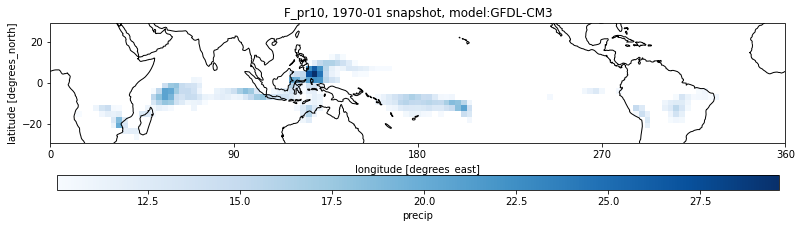

In [65]:
plot_snapshot(precip_monthly.isel(time=0).where(precip_monthly.isel(time=0)>10), 'Blues', 'F_pr10, '+ str(precip_monthly.isel(time=0).coords['time'].values)[:7], model)

In [38]:
precip_month.where(precip_month>10).isnull().sum(dim=('lat','lon'))

<xarray.DataArray 'precip' ()>
array(2551)
Coordinates:
    time     object 1970-01-31 00:00:00

In [44]:
F_pr10_month = precip_month.where(precip_month>10, np.nan).notnull().sum()/precip_month.size
F_pr10_month

<xarray.DataArray 'precip' ()>
array(0.09410511)
Coordinates:
    time     object 1970-01-31 00:00:00

In [53]:
count_exceedingThreshold = precip_monthly.where(precip_monthly>10).notnull().sum(dim=['lat','lon'])
# count_totalGridboxes = precip_monthly.shape[1] * precip_monthly.shape[2]
# F_pr10  = count_exceedingThreshold / count_totalGridboxes
F_pr10 = count_exceedingThreshold

In [51]:
np.shape(F_pr10)

(360,)

Text(0.5, 0, 'month')

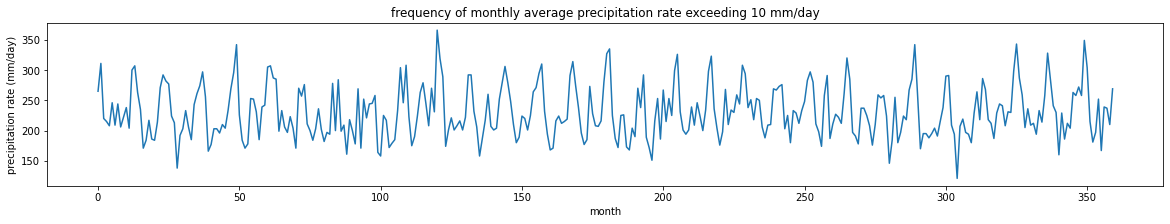

In [56]:
plt.figure(figsize= (20,3))
plt.plot(F_pr10)
plt.title('frequency of monthly average precipitation rate exceeding 10 mm/day')
plt.ylabel('precipitation rate (mm/day)')
plt.xlabel('month')